Connecting Drive (data storage workspace) with Google colab

In [35]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
/gdrive


In [36]:
ls

MyDrive/  Shareddrives/


In [37]:
cd/gdrive/My Drive/Book Selling Analysis/

/gdrive/My Drive/Book Selling Analysis


In [38]:
ls

bestsellers.csv


Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
sns.set(style="white")
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Data Uplodation

In [40]:
data = pd.read_csv('bestsellers.csv')

In [41]:
data.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Numeric Column

In [43]:
for column in data.select_dtypes(include=[np.number]).columns:
    print(column)

User Rating
Reviews
Price
Year


In [44]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [45]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

EDA

In [46]:
from typing import List
def plot_histogram(data_frame: str=data):    
    # selecting names of numeric columns
    columns_to_plot: List[str] = data_frame.select_dtypes(include=[np.number]).columns     
    # iterating over every numeric column
    for column in columns_to_plot:
        fig = px.histogram(data_frame=data_frame, x=column)        
        fig.update_layout(title=dict(text=column, x=0.5)) # x parameter sets position of the title
        fig.show()

In [47]:
plot_histogram()

distribution of fiction and non-fiction bestsellers changed over the years

In [48]:
grouped_by_year_and_genre = (data.groupby(['Year', 'Genre'])
                             .count()
                             .reset_index()
                             # renaming colum
                            .rename(columns={'Name': 'count'}))
# visualization
fig = px.bar(data_frame=grouped_by_year_and_genre, 
             x='Year', y='count',
             color='Genre',
            barmode='group')            
fig.update_layout(title=dict(text='<b>Bestsellers over years with genre - Amazon<b>',
                            x=0.5, font=dict(size=24)),
                  font=dict(family='Lato',
                           size=16))
fig

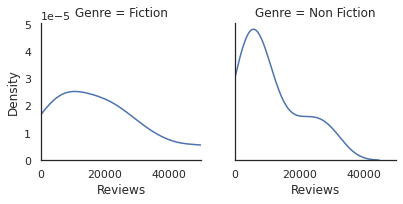

In [49]:
# Single year analysis
year_2014 = data[data['Year'] == 2014]
g = sns.FacetGrid(year_2014, col='Genre', xlim=(0, 5e4)) 
g.map(sns.kdeplot, 'Reviews')

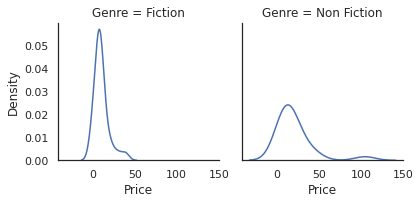

In [50]:
g = sns.FacetGrid(year_2014, col='Genre')
g.map(sns.kdeplot, 'Price')

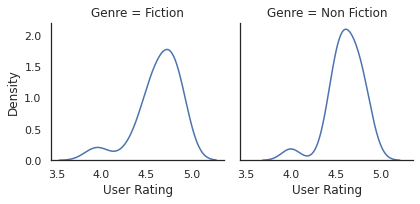

In [51]:
g = sns.FacetGrid(year_2014, col='Genre')
g.map(sns.kdeplot, 'User Rating')

In [52]:
fiction_2014 = year_2014[year_2014['Genre'] == 'Fiction']
non_fiction_2014 = year_2014[year_2014['Genre'] == 'Non Fiction']

In [53]:
fig = make_subplots(rows=1, cols=2, column_titles=['Fiction', 'Non-fiction'],
                   shared_yaxes=True)
# adding trace with fiction authors
fig.add_trace(go.Bar(x=fiction_2014['Author'].value_counts().index[:5],
                    y=fiction_2014['Author'].value_counts().values[:5],
                    showlegend=False),
              row=1,col=1)
# adding non-fiction authors
fig.add_trace(go.Bar(x=non_fiction_2014['Author'].value_counts().index[:5],
                    y=non_fiction_2014['Author'].value_counts().values[:5],
                    showlegend=False),row=1,col=2)
# some styling
fig.update_layout(yaxis=dict(range=[0.1, 3], dtick=1),
                 title=dict(text='<b>Bestsellers authors in 2014 with genre - Amazon<b>',
                            font=dict(size=24),
                           x=0.5),
                 font=dict(family='Lato', size=16))

In [54]:
data[data['Author'] == 'John Green']

,Name,Author,User Rating,Reviews,Price,Year,Genre
221,Looking for Alaska,John Green,4.5,8491,7,2014,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
366,The Fault in Our Stars,John Green,4.7,50482,13,2013,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction


Author has the biggest amount of bestsellers - Top10

In [55]:
fig = px.bar(x=data['Author'].value_counts().index[:10],
            y=data['Author'].value_counts().values[:10])
fig.update_layout(xaxis=dict(title='author'),
                 yaxis=dict(title='amount of books'),
                 font=dict(family='Lato', size=16),
                 title=dict(text='<b>Authorwise amount of bestsellers<b>',
                            font=dict(size=24),x=.5))

Book price correlation with book rating

In [56]:
data.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


In [57]:
fig = px.scatter(data_frame=data, x='Price',y='User Rating')
fig

% of book available free of cost

In [58]:
data['free_or_not_free'] = data['Price'].apply(lambda price:  'free' if not price else 'not free')

In [59]:
fig = go.Figure()
colors = ['lime', 'grey']
fig = fig.add_trace(
                        go.Pie(labels=data['free_or_not_free'].
                           value_counts().index, 
                           values=data['free_or_not_free'].
                           value_counts().values,
                        hoverinfo='label+percent',
                        textinfo='percent',
                        textfont=dict(size=14, color='black'),
                        marker=dict(colors=colors,line=dict(width=2)), hole=0.7))
fig.update_layout(
    font=dict(family='Lato', size=16, color='black'),
    title=dict(text='<b>STATS of BESTSELLERS - AMAZON<b>', font=dict(size=24),x=0.5),plot_bgcolor='white'
)

Fiction

In [60]:
np.mean(data.loc[data['Genre'] == 'Fiction', 'Price'])

10.85

Non-Fiction

In [61]:
np.mean(data.loc[data['Genre'] == 'Non Fiction', 'Price'])

14.841935483870968

Conclusion

In [62]:
print("Fiction books are at average cheaper than non fiction books.")

Fiction books are at average cheaper than non fiction books.
